In [1]:
# Data Manupulation
import numpy as np
import pandas as pd


# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

# CSV File - Read
df = pd.read_csv('E:\\credit\\LGD.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

dfInput = df.iloc[:,1:5] # 0  is not required
#print(df2.head())

#print(df.head())

dfoutput = df.iloc[:,-1]
#print(df3.head())

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  
0           203.319595  
1           402.197302  
2           553.132096  
3           292.430579  
4           246.540576  
2
(15290, 7)


In [2]:
split = int(0.8*len(df))
#print(df2[:split])
#print(df2[:split].shape)

#print(df3[:split])
#print(df3[:split].shape)

#dfInput= x , dfoutput=Y

X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]
#print(X_train.shape)
#print(Y_train.shape)
model = LogisticRegression()
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [3]:
# pd.get_dummies allows to convert a categorical variable into dummy variables
# Create a set of dummy variables from the sex variable
df_Gender = pd.get_dummies(df['Gender'])
df_Married = pd.get_dummies(df['Married'])
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_Gender], axis=1)
df_new = pd.concat([df_new, df_Married], axis=1)         
df_new

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,F,M,Married,Single
0,150024,24,5,1,M,Married,203.319595,0,1,1,0
1,144880,31,10,1,F,Single,402.197302,1,0,0,1
2,133742,56,37,1,M,Married,553.132096,0,1,1,0
3,151282,52,31,1,F,Married,292.430579,1,0,1,0
4,174407,20,3,1,M,Single,246.540576,0,1,0,1
5,142548,29,8,1,M,Married,384.676395,0,1,1,0
6,183396,36,19,1,F,Single,462.158856,1,0,0,1
7,106838,67,49,1,F,Married,168.934036,1,0,1,0
8,137434,69,48,1,M,Single,69.893041,0,1,0,1
9,192628,16,0,1,F,Single,242.772576,1,0,0,1


In [4]:
dfClean = df_new[['Age','Number of Vehicles','F','Single','Losses in Thousands']].copy()
print(dfClean.head(5))

   Age  Number of Vehicles  F  Single  Losses in Thousands
0   24                   1  0       0           203.319595
1   31                   1  1       1           402.197302
2   56                   1  0       0           553.132096
3   52                   1  1       0           292.430579
4   20                   1  0       1           246.540576


In [5]:
dfClean = dfClean.rename(columns={'Number of Vehicles': 'nVeh', 'Losses in Thousands': 'LTh'})
print(dfClean.head(5)) 

dfInput = dfClean.iloc[:,0:4] 

dfoutput = dfClean.iloc[:,-1]
split = int(0.8*len(dfClean))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

model = LogisticRegression()
print(model)

   Age  nVeh  F  Single         LTh
0   24     1  0       0  203.319595
1   31     1  1       1  402.197302
2   56     1  0       0  553.132096
3   52     1  1       0  292.430579
4   20     1  0       1  246.540576
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [6]:
dfClean.describe()

,Age,nVeh,F,Single,LTh
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,42.328254,2.495880,0.506671,0.490974,389.859718
std,18.280511,0.953776,0.499972,0.499935,253.729433
min,16.000000,1.000000,0.000000,0.000000,12.534521
25%,24.000000,2.000000,0.000000,0.000000,226.434217
50%,42.000000,2.000000,1.000000,0.000000,354.937874
75%,61.000000,3.000000,1.000000,1.000000,488.676927
max,70.000000,4.000000,1.000000,1.000000,3500.000000


In [7]:
import numpy as np
# Categorise Rating to Binary
dfClean['RatingScore'] = np.where(dfClean['LTh']>=350, 1, 0)
print(dfClean.head())

   Age  nVeh  F  Single         LTh  RatingScore
0   24     1  0       0  203.319595            0
1   31     1  1       1  402.197302            1
2   56     1  0       0  553.132096            1
3   52     1  1       0  292.430579            0
4   20     1  0       1  246.540576            0


In [8]:
# Remove unwanted columns

dfClean2 = dfClean.drop(['LTh'], axis=1)
print(dfClean2.head())

   Age  nVeh  F  Single  RatingScore
0   24     1  0       0            0
1   31     1  1       1            1
2   56     1  0       0            1
3   52     1  1       0            0
4   20     1  0       1            0


In [9]:
dfInput = dfClean.iloc[:,0:4] 
print(dfInput.head())
dfoutput = dfClean.iloc[:,-1]
print(dfoutput.head())


split = int(0.8*len(dfClean))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

model = LogisticRegression()
print(model)

   Age  nVeh  F  Single
0   24     1  0       0
1   31     1  1       1
2   56     1  0       0
3   52     1  1       0
4   20     1  0       1
0    0
1    1
2    1
3    0
4    0
Name: RatingScore, dtype: int32
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [10]:
from sklearn import preprocessing
from sklearn import utils

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

('model score::', 0.6972694571615435)


C:\Users\rs\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
probability = model.predict_proba(X_test)
print(probability)

[[0.56517827 0.43482173]
 [0.29139554 0.70860446]
 [0.11773683 0.88226317]
 ...
 [0.91495473 0.08504527]
 [0.30976992 0.69023008]
 [0.48099462 0.51900538]]


In [12]:
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

[[1022  463]
 [ 453 1120]]


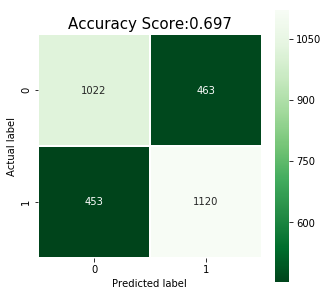

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test , predicted)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);